# Sesión 9: Modelos de aprendizaje profundo
Realizado por:

**- Ruelas Flores, César Diego**

## VARIABLES GLOBALES

In [ ]:
# %pip install tensorflow

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import polars as pl
import pytest
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input

In [2]:
# Semilla global para reproducibilidad
SEED = 42

## FUNCIONES DE UTILIDAD

In [ ]:
%%writefile utils.py

import numpy as np
import matplotlib.pyplot as plt
import polars as pl
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import Input


def cargar_datos_clasificacion() -> tuple[np.ndarray, np.ndarray]:
    """
    Carga el dataset de cáncer de mama desde scikit-learn y lo convierte a arrays.

    Returns:
        X: Array con características.
        y: Array con etiquetas binarias (1: maligno, 0: benigno).
    """
    datos = load_breast_cancer()
    X = datos.data
    y = np.where(datos.target == 0, 1, 0)
    return X, y


def crear_modelo_clasificacion() -> MLPClassifier:
    """
    Crea un modelo MLPClassifier configurado para clasificación binaria.

    Returns:
        Modelo MLPClassifier listo para entrenamiento.
    """
    return MLPClassifier(
        hidden_layer_sizes=(50, 25),
        activation='relu',
        solver='adam',
        max_iter=1000,
        early_stopping=True,
        random_state=42
    )


def evaluar_modelo_clasificacion(modelo: MLPClassifier, X_test: np.ndarray, y_test: np.ndarray) -> None:
    """
    Evalúa el modelo MLP con métricas estándar y matriz de confusión.

    Args:
        modelo: Modelo entrenado.
        X_test: Datos de entrada de prueba.
        y_test: Etiquetas verdaderas.
    """
    y_pred = modelo.predict(X_test)
    print("\n🔍 Reporte de Clasificación:")
    print(classification_report(y_test, y_pred, target_names=['Benigno', 'Maligno']))
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(cm, display_labels=['Benigno', 'Maligno'])
    disp.plot(cmap='Blues')
    plt.title("Matriz de Confusión")
    plt.show()


def preprocesar_mnist() -> tuple[np.ndarray, np.ndarray, np.ndarray, np.ndarray]:
    """
    Carga y preprocesa el dataset MNIST para su uso en CNN.

    Returns:
        X_train, X_test, y_train, y_test: Datos normalizados y etiquetas codificadas.
    """
    (X_train, y_train), (X_test, y_test) = mnist.load_data()
    X_train = X_train.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    X_test = X_test.reshape(-1, 28, 28, 1).astype('float32') / 255.0
    y_train = to_categorical(y_train)
    y_test = to_categorical(y_test)
    return X_train, X_test, y_train, y_test


def crear_cnn() -> Sequential:
    """
    Crea y compila un modelo de red neuronal convolucional simple para MNIST.

    Returns:
        Modelo CNN compilado.
    """
    model = Sequential([
        Input(shape=(28, 28, 1)),  # ✅ Solución a la advertencia de Keras
        Conv2D(32, (3, 3), activation='relu'),
        MaxPooling2D((2, 2)),
        Flatten(),
        Dense(128, activation='relu'),
        Dense(10, activation='softmax')
    ])
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model


def entrenar_cnn(modelo: Sequential, X_train: np.ndarray, y_train: np.ndarray, epochs: int = 10) -> None:
    """
    Entrena una red CNN y visualiza la evolución de la precisión.

    Args:
        modelo: Modelo CNN.
        X_train: Imágenes de entrenamiento.
        y_train: Etiquetas en one-hot.
        epochs: Número de épocas de entrenamiento.
    """
    historia = modelo.fit(
        X_train, y_train,
        validation_split=0.2,
        epochs=epochs,
        batch_size=128,
        verbose=1
    )
    plt.plot(historia.history['accuracy'], label='Entrenamiento')
    plt.plot(historia.history['val_accuracy'], label='Validación')
    plt.title('Evolución de la Precisión')
    plt.xlabel('Epoca')
    plt.ylabel('Precisión')
    plt.legend()
    plt.show()


Overwriting utils.py


## IMPLEMENTACIÓN PRINCIPAL


PARTE A: CLASIFICACIÓN DE CÁNCER DE MAMA

🔍 Reporte de Clasificación:
              precision    recall  f1-score   support

     Benigno       0.91      0.93      0.92        72
     Maligno       0.88      0.83      0.85        42

    accuracy                           0.89       114
   macro avg       0.89      0.88      0.89       114
weighted avg       0.89      0.89      0.89       114



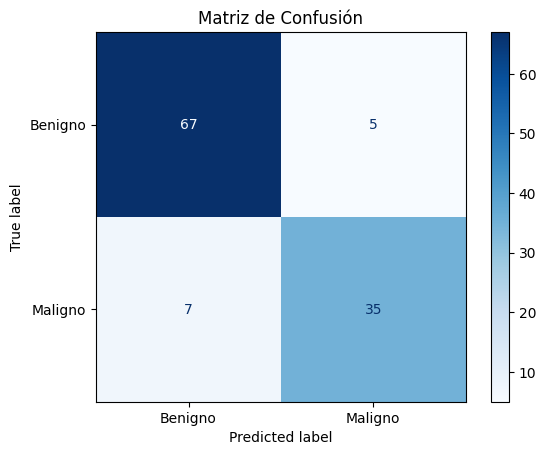

In [32]:
from utils import *
from sklearn.preprocessing import StandardScaler

if __name__ == "__main__":
    print("\n" + "=" * 50)
    print("PARTE A: CLASIFICACIÓN DE CÁNCER DE MAMA")
    print("=" * 50)

    X, y = cargar_datos_clasificacion()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    modelo = crear_modelo_clasificacion()
    modelo.fit(X_train, y_train)
    evaluar_modelo_clasificacion(modelo, X_test, y_test)


PARTE B: RED CONVOLUCIONAL CON MNIST

🧠 Arquitectura de la CNN:


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 5408)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       692,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 693,962 (2.65 MB)

 Trainable params: 693,962 (2.65 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 11s 24ms/step - accuracy: 0.8625 - loss: 0.4934 - val_accuracy: 0.9722 - val_loss: 0.1044
Epoch 2/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 24ms/step - accuracy: 0.9758 - loss: 0.0877 - val_accuracy: 0.9768 - val_loss: 0.0746
Epoch 3/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9829 - loss: 0.0578 - val_accuracy: 0.9793 - val_loss: 0.0679
Epoch 4/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 9s 23ms/step - accuracy: 0.9875 - loss: 0.0430 - val_accuracy: 0.9830 - val_loss: 0.0564
Epoch 5/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 8s 21ms/step - accuracy: 0.9910 - loss: 0.0294 - val_accuracy: 0.9839 - val_loss: 0.0553
Epoch 6/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 10s 27ms/step - accuracy: 0.9933 - loss: 0.0241 - val_accuracy: 0.9845 - val_loss: 0.0553
Epoch 7/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 12s 32ms/step - accuracy: 0.9949 - loss: 0.0177 - val_accuracy: 0.9845 - val_loss: 0.0536
Epoch 8/10
375/375 ━━━━━━━━━━━━━━━━━━━━ 19s 27ms/step - accuracy: 0.9958 - loss: 0.0145 - val_

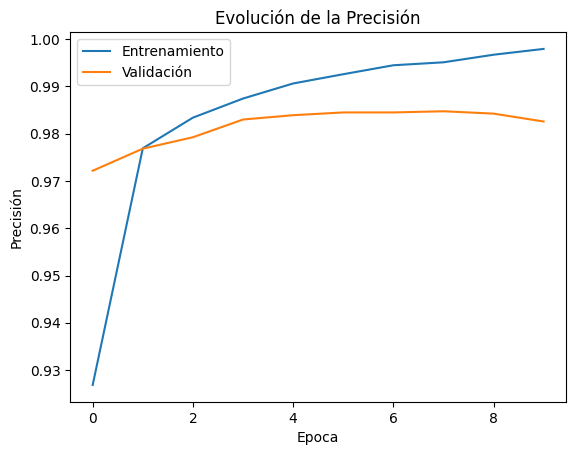


🎯 Precisión en test: 98.59%


In [33]:
print("\n" + "=" * 50)
print("PARTE B: RED CONVOLUCIONAL CON MNIST")
print("=" * 50)

X_train_mnist, X_test_mnist, y_train_mnist, y_test_mnist = preprocesar_mnist()
modelo_cnn = crear_cnn()
print("\n🧠 Arquitectura de la CNN:")
modelo_cnn.summary()
entrenar_cnn(modelo_cnn, X_train_mnist, y_train_mnist, epochs=10)
loss, acc = modelo_cnn.evaluate(X_test_mnist, y_test_mnist, verbose=0)
print(f"\n🎯 Precisión en test: {acc:.2%}")

## TESTING (test_utils.py)

In [36]:
%%writefile ../tests/test_utils.py
import numpy as np
from sklearn.neural_network import MLPClassifier
from src.utils import cargar_datos_clasificacion, crear_modelo_clasificacion, preprocesar_mnist, crear_cnn
import pytest


def test_cargar_datos_clasificacion():
    X, y = cargar_datos_clasificacion()
    assert isinstance(X, np.ndarray)
    assert isinstance(y, np.ndarray)
    assert X.shape[0] == y.shape[0]
    assert X.shape[1] > 0
    assert set(np.unique(y)).issubset({0, 1})


def test_crear_modelo_clasificacion():
    modelo = crear_modelo_clasificacion()
    assert isinstance(modelo, MLPClassifier)
    assert hasattr(modelo, 'fit')
    assert hasattr(modelo, 'predict')


def test_preprocesar_mnist():
    X_train, X_test, y_train, y_test = preprocesar_mnist()
    assert X_train.shape[1:] == (28, 28, 1)
    assert X_train.dtype == np.float32
    assert X_train.max() <= 1.0
    assert y_train.shape[1] == 10  # One-hot


def test_crear_cnn():
    cnn = crear_cnn()
    assert hasattr(cnn, 'fit')
    assert hasattr(cnn, 'evaluate')
    assert cnn.input_shape == (None, 28, 28, 1)

Overwriting ../tests/test_utils.py


## EJECUCIÓN

In [ ]:
# %pip install tensorflow

metodo local para test

In [ ]:
import os
import sys

# Esta es la ruta que pytest usa como rootdir.
project_root_path = r'c:\Users\AzShet\Documents\Jupyter_LAB\jupyter_projects\5to_ciclo\DataMining\lab9\Data_Mining-LAB09'


'''
cambiamos el directorio de trabajo del kernel de jupyter a la raiz de mi proyecto.
para que el pytest encuentre el 'pytest.ini
'''

%cd {project_root_path}
print(f"Directorio de trabajo actual establecido en: {os.getcwd()}")

'''
toca configurar la variable de entorno de PYTHONPATH; para que python sepa donde buscar el paquete 'src'(ya que lo tenemos en el root del proyecto)
'''

os.environ['PYTHONPATH'] = project_root_path + os.pathsep + os.environ.get('PYTHONPATH', '')
print(f"PYTHONPATH establecido en: {os.environ['PYTHONPATH']}")

c:\Users\AzShet\Documents\Jupyter_LAB\jupyter_projects\5to_ciclo\DataMining\lab9\Data_Mining-LAB09
Directorio de trabajo actual establecido en: c:\Users\AzShet\Documents\Jupyter_LAB\jupyter_projects\5to_ciclo\DataMining\lab9\Data_Mining-LAB09
PYTHONPATH establecido en: c:\Users\AzShet\Documents\Jupyter_LAB\jupyter_projects\5to_ciclo\DataMining\lab9\Data_Mining-LAB09;c:\Users\AzShet\Documents\Jupyter_LAB\jupyter_projects\5to_ciclo\DataMining\lab9\Data_Mining-LAB09;c:\Users\AzShet\Documents\Jupyter_LAB\jupyter_projects\5to_ciclo\DataMining\lab9\Data_Mining-LAB09;


In [63]:
!pytest tests/test_utils.py -v

============================= test session starts =============================
platform win32 -- Python 3.12.5, pytest-8.4.0, pluggy-1.6.0 -- c:\Users\AzShet\Documents\Jupyter_LAB\jupyter_projects\5to_ciclo\DataMining\lab9\.venv\Scripts\python.exe
cachedir: .pytest_cache
rootdir: c:\Users\AzShet\Documents\Jupyter_LAB\jupyter_projects\5to_ciclo\DataMining\lab9\Data_Mining-LAB09
configfile: pytest.ini
collecting ... collected 4 items

tests/test_utils.py::test_cargar_datos_clasificacion PASSED              [ 25%]
tests/test_utils.py::test_crear_modelo_clasificacion PASSED              [ 50%]
tests/test_utils.py::test_preprocesar_mnist PASSED                       [ 75%]
tests/test_utils.py::test_crear_cnn PASSED                               [100%]

============================= 4 passed in 13.01s ==============================
